In [1]:
# Install the required libraries
!pip install prophet
!pip install hvplot
!pip install holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Install and import the required libraries and dependencies**

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import holoviews as hv
from prophet import Prophet
import hvplot.pandas
import datetime as dt
import numpy as np

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

**Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Use hvPlot to visualize the results. Do any unusual patterns exist?**

In [3]:
# Upload the "google_hourly_search_trends.csv" file into Colab, then store in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.

from google.colab import files
uploaded = files.upload()

Saving google_hourly_search_trends.csv to google_hourly_search_trends (1).csv


In [32]:
df_mercado_trends = pd.read_csv('google_hourly_search_trends.csv')

# Review the first and last five rows of the DataFrame
df_mercado_trends


,Date,Search Trends
0,6/1/16 0:00,97
1,6/1/16 1:00,92
2,6/1/16 2:00,76
3,6/1/16 3:00,60
4,6/1/16 4:00,38
...,...,...
37101,9/7/20 20:00,71
37102,9/7/20 21:00,83
37103,9/7/20 22:00,96
37104,9/7/20 23:00,97


In [33]:
# Review the data types of the DataFrame using the info function
df_mercado_trends.dtypes

Date             object
Search Trends     int64
dtype: object

In [34]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

Output hidden; open in https://colab.research.google.com to view.

In [36]:
# Slice the DataFrame to just the month of May 2020
# Set Date as Datetime object
df_mercado_trends['Date'] = pd.to_datetime(
    df_mercado_trends['Date'],
    infer_datetime_format=True,
    utc=True
)
# Set Date as index
df_mercado_trends = df_mercado_trends.set_index("Date")
# Review Dataframe
df_mercado_trends


,Search Trends
Date,
2016-06-01 00:00:00+00:00,97
2016-06-01 01:00:00+00:00,92
2016-06-01 02:00:00+00:00,76
2016-06-01 03:00:00+00:00,60
2016-06-01 04:00:00+00:00,38
...,...
2020-09-07 20:00:00+00:00,71
2020-09-07 21:00:00+00:00,83
2020-09-07 22:00:00+00:00,96


In [37]:
# Slice the DataFrame to just the month of May 2020
df_may_2020 = df_mercado_trends.loc["2020-05"]

df_may_2020.head()

,Search Trends
Date,
2020-05-01 00:00:00+00:00,80
2020-05-01 01:00:00+00:00,80
2020-05-01 02:00:00+00:00,76
2020-05-01 03:00:00+00:00,66
2020-05-01 04:00:00+00:00,53


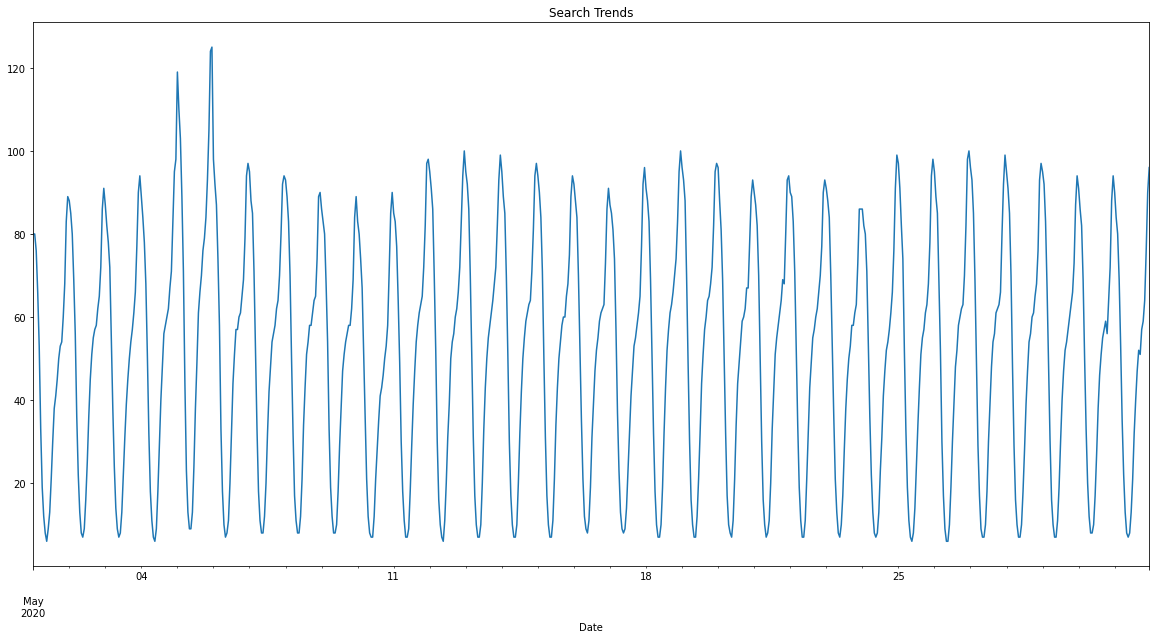

In [38]:
# Use hvPlot to visualize the data for May 2020
df_may_2020["Search Trends"].plot(
    title="Search Trends", 
    figsize=[20, 10]
)

**Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results**

In [39]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = df_may_2020["Search Trends"].sum()

# View the traffic_may_2020 value
traffic_may_2020


38181

In [40]:
# Calcluate the monhtly median search traffic across all months 
# Group the DataFrame by index year and then index month, chain the sum and then the median functions
median_monthly_traffic = df_mercado_trends['Search Trends'].groupby(by=[df_mercado_trends.index.year,df_mercado_trends.index.month] ).sum()
median_monthly_traffic = median_monthly_traffic.median()
# View the median_monthly_traffic value
median_monthly_traffic

35172.5

In [41]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
if median_monthly_traffic >  traffic_may_2020:
  print ("Traffic of May, 2020 is less than Median of the search trends")
elif median_monthly_traffic <  traffic_may_2020:
  print ("Traffic of May, 2020 is greater than Median of the search trends")
else:
  print ("The May, 2020 search traffic is equal to the Median of the search trends") 

Traffic of May, 2020 is greater than Median of the search trends


##### Answer the following question: 
**Question:** Did the Google search traffic increase during the month that MercadoLibre released its financial results?

**Answer:** # Yes, the Google search reflects that during the month that MercadoLibre released its financial results, the traffic did increase. 

## Step 2: Mine the Search Traffic Data for Seasonality


#### Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

In [42]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the day of week 
df_mercado_trends.groupby(by=[df_mercado_trends.index.dayofweek]).mean().hvplot()


Output hidden; open in https://colab.research.google.com to view.

#### Using hvPlot, visualize this traffic as a heatmap, referencing the `index.hour` as the x-axis and the `index.dayofweek` as the y-axis. Does any day-of-week effect that you observe concentrate in just a few hours of that day?

In [43]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the hour of the day and day of week search traffic as a heatmap.
df_mercado_trends.hvplot.heatmap(
    x='index.hour',
    y='index.dayofweek',
    C='Search Trends',
    cmap='reds'
).aggregate(function=np.mean)

Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:
**Question:** Does any day-of-week effect that you observe concentrate in just a few hours of that day?

**Answer:** # On all of the days of the week, it is obsserved that the most number of search hits occur between 0 - 1 hour and 22 - 23 hour.  

####  Group the search data by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

In [44]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Group the hourly search data to plot (use hvPlot) the average traffic by the week of the year
df_mercado_trends.groupby(by=[df_mercado_trends.index.weekofyear]).mean().hvplot()

Output hidden; open in https://colab.research.google.com to view.

##### Answer the following question:
**Question:** Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?

**Answer:** During peak holiday season, there is a general decline in the search trend but as an overall, there is not a significant change in the search trends.

**Relate the Search Traffic to Stock Price Patterns**

In [45]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
from google.colab import files
uploaded = files.upload()

Saving mercado_stock_price.csv to mercado_stock_price (2).csv


In [46]:
df_mercado_stock = pd.read_csv('mercado_stock_price.csv')

# View the first and last five rows of the DataFrame
df_mercado_stock


,date,close
0,2015-01-02 09:00:00,127.670
1,2015-01-02 10:00:00,125.440
2,2015-01-02 11:00:00,125.570
3,2015-01-02 12:00:00,125.400
4,2015-01-02 13:00:00,125.170
...,...,...
48890,2020-07-31 11:00:00,1105.780
48891,2020-07-31 12:00:00,1087.925
48892,2020-07-31 13:00:00,1095.800
48893,2020-07-31 14:00:00,1110.650


In [47]:
# Set Date as Datetime object
df_mercado_stock['date'] = pd.to_datetime(
    df_mercado_stock["date"],
    infer_datetime_format =True,
    utc = True)

# Set Date as index
df_mercado_stock = df_mercado_stock.set_index("date")

In [48]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the closing price of the df_mercado_stock DataFrame
df_mercado_stock['close'].plot(figsize=[20,10])


Output hidden; open in https://colab.research.google.com to view.

In [49]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data
mercado_stock_trends_df = pd.concat([df_mercado_stock, df_mercado_trends], axis=1)

mercado_stock_trends_df = mercado_stock_trends_df.dropna()

# View the first and last five rows of the DataFrame
mercado_stock_trends_df


,close,Search Trends
2016-06-01 09:00:00+00:00,135.160,6.0
2016-06-01 10:00:00+00:00,136.630,12.0
2016-06-01 11:00:00+00:00,136.560,22.0
2016-06-01 12:00:00+00:00,136.420,33.0
2016-06-01 13:00:00+00:00,136.100,40.0
...,...,...
2020-07-31 11:00:00+00:00,1105.780,20.0
2020-07-31 12:00:00+00:00,1087.925,32.0
2020-07-31 13:00:00+00:00,1095.800,41.0
2020-07-31 14:00:00+00:00,1110.650,47.0


Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (2020-01 to 2020-06 in the DataFrame), and then use hvPlot to plot the data. Do both time series indicate a common trend that’s consistent with this narrative

In [50]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06) 
first_half_2020 = mercado_stock_trends_df.loc['2020-01':'2020-06'][['close','Search Trends']]

# View the first and last five rows of first_half_2020 DataFrame
first_half_2020

,close,Search Trends
2020-01-02 09:00:00+00:00,601.085,9.0
2020-01-02 10:00:00+00:00,601.290,14.0
2020-01-02 11:00:00+00:00,615.410,25.0
2020-01-02 12:00:00+00:00,611.400,37.0
2020-01-02 13:00:00+00:00,611.830,50.0
...,...,...
2020-06-30 11:00:00+00:00,976.170,17.0
2020-06-30 12:00:00+00:00,977.500,27.0
2020-06-30 13:00:00+00:00,973.230,37.0
2020-06-30 14:00:00+00:00,976.500,45.0


In [51]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `hvplot(shared_axes=False, subplots=True).cols(1)`
first_half_2020.hvplot(shared_axes=False, subplots=True).cols(1)


Output hidden; open in https://colab.research.google.com to view.

Answer the following question:
Question: Do both time series indicate a common trend that’s consistent with this narrative?

Answer: # There is an upward trend in the search history and closing price of the shares. 

Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns

In [52]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
# This column should shift the Search Trends information by one hour
mercado_stock_trends_df['Lagged Search Trends'] = mercado_stock_trends_df["Search Trends"].shift(1)


In [53]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
mercado_stock_trends_df['Stock Volatility'] = mercado_stock_trends_df["close"].pct_change().rolling(window=4).std()


In [54]:
mercado_stock_trends_df

,close,Search Trends,Lagged Search Trends,Stock Volatility
2016-06-01 09:00:00+00:00,135.160,6.0,NaN,NaN
2016-06-01 10:00:00+00:00,136.630,12.0,6.0,NaN
2016-06-01 11:00:00+00:00,136.560,22.0,12.0,NaN
2016-06-01 12:00:00+00:00,136.420,33.0,22.0,NaN
2016-06-01 13:00:00+00:00,136.100,40.0,33.0,0.006134
...,...,...,...,...
2020-07-31 11:00:00+00:00,1105.780,20.0,11.0,0.012837
2020-07-31 12:00:00+00:00,1087.925,32.0,20.0,0.013549
2020-07-31 13:00:00+00:00,1095.800,41.0,32.0,0.013295
2020-07-31 14:00:00+00:00,1110.650,47.0,41.0,0.013001


In [55]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# Use hvPlot to visualize the stock volatility
mercado_stock_trends_df["Stock Volatility"].plot(figsize=[20,10])


Output hidden; open in https://colab.research.google.com to view.

Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [56]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
# This column should calculate hourly return percentage of the closing price
mercado_stock_trends_df['Hourly Stock Return'] = mercado_stock_trends_df["close"].pct_change()


In [57]:
# View the first and last five rows of the mercado_stock_trends_df DataFrame
# YOUR CODE HERE
mercado_stock_trends_df

,close,Search Trends,Lagged Search Trends,Stock Volatility,Hourly Stock Return
2016-06-01 09:00:00+00:00,135.160,6.0,NaN,NaN,NaN
2016-06-01 10:00:00+00:00,136.630,12.0,6.0,NaN,0.010876
2016-06-01 11:00:00+00:00,136.560,22.0,12.0,NaN,-0.000512
2016-06-01 12:00:00+00:00,136.420,33.0,22.0,NaN,-0.001025
2016-06-01 13:00:00+00:00,136.100,40.0,33.0,0.006134,-0.002346
...,...,...,...,...,...
2020-07-31 11:00:00+00:00,1105.780,20.0,11.0,0.012837,0.006380
2020-07-31 12:00:00+00:00,1087.925,32.0,20.0,0.013549,-0.016147
2020-07-31 13:00:00+00:00,1095.800,41.0,32.0,0.013295,0.007239
2020-07-31 14:00:00+00:00,1110.650,47.0,41.0,0.013001,0.013552


Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns

In [58]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
mercado_stock_trends_df[["Lagged Search Trends", "Hourly Stock Return", "Stock Volatility"]].corr()

,Lagged Search Trends,Hourly Stock Return,Stock Volatility
Lagged Search Trends,1.000000,0.017929,-0.148938
Hourly Stock Return,0.017929,1.000000,0.061424
Stock Volatility,-0.148938,0.061424,1.000000


Answer the following question:
Question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

Answer: # There is a weak negative correlation between lagged search traffic and the stock volatility and weak positive coorelation between lagged search traffic and the stock price returns.

**Create a Time Series Model with Prophet**


In [59]:
df_mercado_trends

,Search Trends
Date,
2016-06-01 00:00:00+00:00,97
2016-06-01 01:00:00+00:00,92
2016-06-01 02:00:00+00:00,76
2016-06-01 03:00:00+00:00,60
2016-06-01 04:00:00+00:00,38
...,...
2020-09-07 20:00:00+00:00,71
2020-09-07 21:00:00+00:00,83
2020-09-07 22:00:00+00:00,96


Set up the Google search data for a Prophet forecasting model.


In [60]:

df_mercado_trends = df_mercado_trends.reset_index()

In [61]:
df_mercado_trends 

,Date,Search Trends
0,2016-06-01 00:00:00+00:00,97
1,2016-06-01 01:00:00+00:00,92
2,2016-06-01 02:00:00+00:00,76
3,2016-06-01 03:00:00+00:00,60
4,2016-06-01 04:00:00+00:00,38
...,...,...
37101,2020-09-07 20:00:00+00:00,71
37102,2020-09-07 21:00:00+00:00,83
37103,2020-09-07 22:00:00+00:00,96
37104,2020-09-07 23:00:00+00:00,97


In [62]:
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index
mercado_prophet_df = df_mercado_trends

# Label the columns ds and y so that the syntax is recognized by Prophet
mercado_prophet_df = mercado_prophet_df.rename(columns={"Date":"ds", "Search Trends":"y"})

# Drop an NaN values from the prophet_df DataFrame
mercado_prophet_df = mercado_prophet_df.dropna()

# View the first and last five rows of the mercado_prophet_df DataFrame
mercado_prophet_df['ds'] = mercado_prophet_df['ds'].dt.tz_localize(None)

mercado_prophet_df

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38
...,...,...
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97


In [63]:
# Call the Prophet function, store as an object
model_mercado_trends = Prophet()

In [64]:
# Fit the time-series model.
model_mercado_trends.fit(mercado_prophet_df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hipm9vl/6o21bs9_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hipm9vl/p8c2vctd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39046', 'data', 'file=/tmp/tmp_hipm9vl/6o21bs9_.json', 'init=/tmp/tmp_hipm9vl/p8c2vctd.json', 'output', 'file=/tmp/tmp_hipm9vl/prophet_model3pwh0r3z/prophet_model-20221105211501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:15:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:15:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [65]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model_mercado_trends.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
future_mercado_trends.head()

,ds
0,2016-06-01 00:00:00
1,2016-06-01 01:00:00
2,2016-06-01 02:00:00
3,2016-06-01 03:00:00
4,2016-06-01 04:00:00


In [66]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame
forecast_mercado_trends = model_mercado_trends.predict(future_mercado_trends)

# Display the first five rows of the forecast_mercado_trends DataFrame
forecast_mercado_trends.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.390875,81.436638,97.733178,44.390875,44.390875,45.227910,45.227910,45.227910,41.452579,...,1.860554,1.860554,1.860554,1.914777,1.914777,1.914777,0.0,0.0,0.0,89.618785
1,2016-06-01 01:00:00,44.391810,77.658059,94.210093,44.391810,44.391810,41.673716,41.673716,41.673716,37.943427,...,1.810460,1.810460,1.810460,1.919830,1.919830,1.919830,0.0,0.0,0.0,86.065527
2,2016-06-01 02:00:00,44.392746,67.363702,84.749340,44.392746,44.392746,31.350247,31.350247,31.350247,27.656523,...,1.768874,1.768874,1.768874,1.924851,1.924851,1.924851,0.0,0.0,0.0,75.742993
3,2016-06-01 03:00:00,44.393681,52.631013,68.799989,44.393681,44.393681,16.083050,16.083050,16.083050,12.417320,...,1.735889,1.735889,1.735889,1.929841,1.929841,1.929841,0.0,0.0,0.0,60.476731
4,2016-06-01 04:00:00,44.394617,34.944647,51.849888,44.394617,44.394617,-1.031813,-1.031813,-1.031813,-4.678072,...,1.711460,1.711460,1.711460,1.934799,1.934799,1.934799,0.0,0.0,0.0,43.362804


After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre

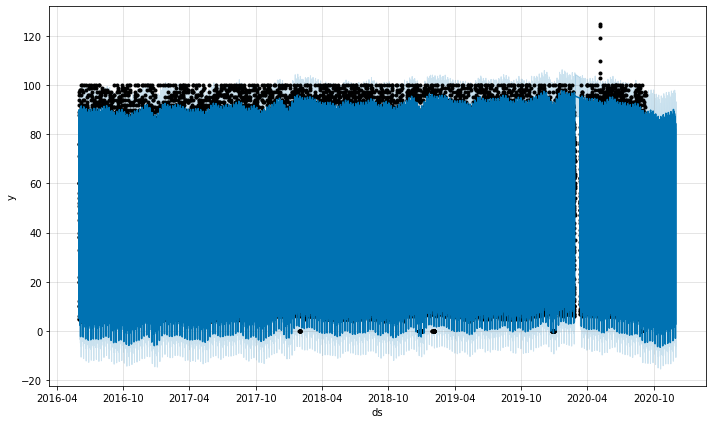

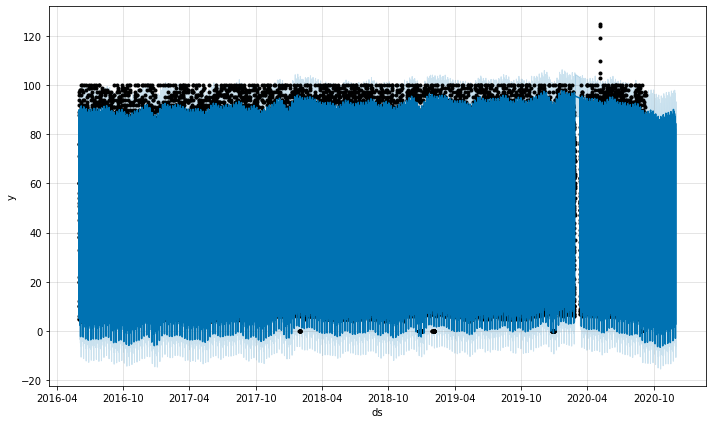

In [67]:
# Plot the Prophet predictions for the Mercado trends data
model_mercado_trends.plot(forecast_mercado_trends)

Answer the following question:
Question: How's the near-term forecast for the popularity of MercadoLibre?

Answer: # The near term popularity of MercadoLibre is has a short term downward trend. 



**Plot the individual time series components of the model to answer the following questions:**

1. What time of day exhibits the greatest popularity?

2. Which day of the week gets the most search traffic?

3. What's the lowest point for search traffic in the calendar year?

In [68]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
forecast_mercado_trends = forecast_mercado_trends.set_index(['ds'])

# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame
forecast_mercado_trends[['yhat_lower','yhat_upper','yhat']].iloc[-2000:,:]

,yhat_lower,yhat_upper,yhat
ds,,,
2020-09-08 01:00:00,77.419552,94.060028,85.503283
2020-09-08 02:00:00,67.039427,84.131949,75.251060
2020-09-08 03:00:00,51.800467,68.172577,60.027949
2020-09-08 04:00:00,33.946768,51.275412,42.931123
2020-09-08 05:00:00,18.721862,35.209505,27.076927
...,...,...,...
2020-11-30 04:00:00,31.389207,47.735210,39.709188
2020-11-30 05:00:00,16.172686,32.916737,24.238074
2020-11-30 06:00:00,3.547740,20.822551,12.272427


yhat represents the most likely (average) forecast, whereas yhat_lower and yhat_upper represents the worst and best case prediction (based on what are known as 95% confidence intervals).

In [69]:
# Holoviews extension to render hvPlots in Colab
hv.extension('bokeh')

# From the forecast_mercado_trends DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours 
forecast_mercado_trends[['yhat_lower','yhat_upper','yhat']].iloc[-2000:,:].hvplot()

Output hidden; open in https://colab.research.google.com to view.

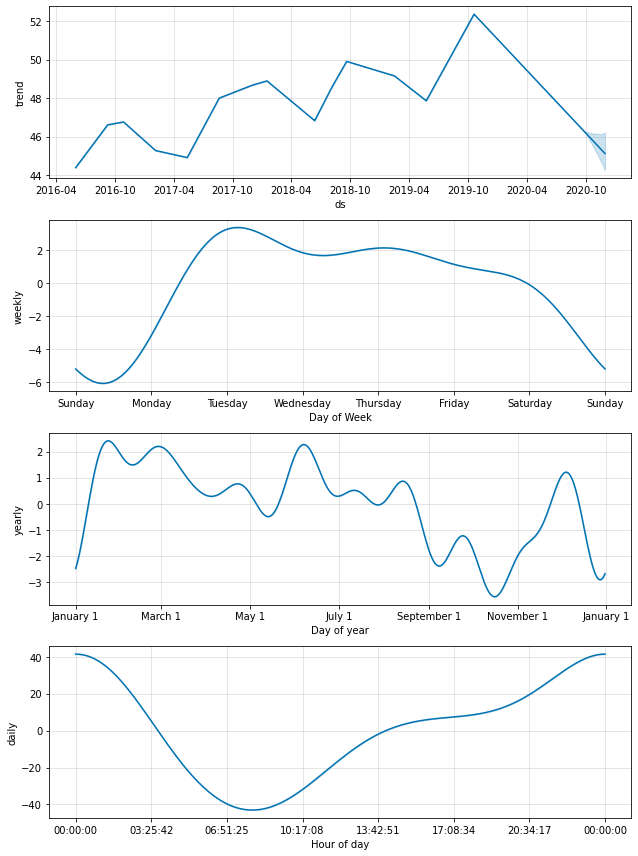

In [70]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results 
# for the forecast_canada DataFrame 

figures_mercado_trends = model_mercado_trends.plot_components(forecast_mercado_trends)


**Answer the following questions:**
1. Question: What time of day exhibits the greatest popularity?

Answer: # Midnight

2. Question: Which day of week gets the most search traffic?

Answer: # Tuesday

3. Question: What's the lowest point for search traffic in the calendar year?

Answer: # November



Forecast Revenue by Using Time Series Models

A few weeks after your initial analysis, the finance group follows up to find out if you can help them solve a different problem. Your fame as a growth analyst in the company continues to grow!

Specifically, the finance group wants a forecast of the total sales for the next quarter. This will dramatically increase their ability to plan budgets and to help guide expectations for the company investors.

To do so, complete the following steps:

Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data. The daily sales figures are quoted in millions of USD dollars.

Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.



Read in the daily historical sales (that is, revenue) figures, and then apply a Prophet model to the data.

In [71]:
# Upload the "mercado_daily_revenue.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the DatetimeIndex
# Sales are quoted in millions of US dollars
from google.colab import files
uploaded = files.upload()

Saving mercado_daily_revenue.csv to mercado_daily_revenue.csv


In [86]:
df_mercado_sales = pd.read_csv('mercado_daily_revenue.csv')



# Review the DataFrame
df_mercado_sales.dtypes


date            object
Daily Sales    float64
dtype: object

In [87]:
# Apply a Facebook Prophet model to the data.
# Set up the dataframe in the neccessary format:
# Reset the index so that date becomes a column in the DataFrame
mercado_sales_prophet_df = df_mercado_sales

# Adjust the columns names to the Prophet syntax
mercado_sales_prophet_df = mercado_sales_prophet_df.rename(columns={"date":"ds", "Daily Sales":"y"})

mercado_sales_prophet_df["ds"] = pd.to_datetime(
    mercado_sales_prophet_df["ds"],
    infer_datetime_format=True,
    utc=True
)

mercado_sales_prophet_df['ds'] = mercado_sales_prophet_df['ds'].dt.tz_localize(None)

# Visualize the DataFrame
mercado_sales_prophet_df.dropna()


,ds,y
0,2019-01-01,0.626452
1,2019-01-02,1.301069
2,2019-01-03,1.751689
3,2019-01-04,3.256294
4,2019-01-05,3.732920
...,...,...
495,2020-05-10,17.467814
496,2020-05-11,17.537152
497,2020-05-12,18.031773
498,2020-05-13,19.165315


In [88]:
mercado_sales_prophet_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [89]:
# Create the model
mercado_sales_prophet_model = Prophet()

# Fit the model
mercado_sales_prophet_model.fit(mercado_sales_prophet_df)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hipm9vl/h4a7pm6d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_hipm9vl/m9my8f3q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33998', 'data', 'file=/tmp/tmp_hipm9vl/h4a7pm6d.json', 'init=/tmp/tmp_hipm9vl/m9my8f3q.json', 'output', 'file=/tmp/tmp_hipm9vl/prophet_modeldo4pep3r/prophet_model-20221105215000.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
21:50:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
21:50:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [90]:
# Predict sales for 90 days (1 quarter) out into the future.

# Start by making a future dataframe
mercado_sales_prophet_future = mercado_sales_prophet_model.make_future_dataframe(periods=90, freq='D')

# Display the last five rows of the future DataFrame
mercado_sales_prophet_future


,ds
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
585,2020-08-08
586,2020-08-09
587,2020-08-10
588,2020-08-11


In [91]:
# Make predictions for the sales each day over the next quarter
mercado_sales_prophet_forecast = mercado_sales_prophet_model.predict(mercado_sales_prophet_future)

# Display the first 5 rows of the resulting DataFrame
mercado_sales_prophet_forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,0.132576,-1.583927,2.123557,0.132576,0.132576,0.063966,0.063966,0.063966,0.063966,0.063966,0.063966,0.0,0.0,0.0,0.196542
1,2019-01-02,0.171762,-1.640089,2.105348,0.171762,0.171762,0.083117,0.083117,0.083117,0.083117,0.083117,0.083117,0.0,0.0,0.0,0.254879
2,2019-01-03,0.210947,-1.672259,2.122348,0.210947,0.210947,0.019670,0.019670,0.019670,0.019670,0.019670,0.019670,0.0,0.0,0.0,0.230618
3,2019-01-04,0.250133,-1.684567,2.171420,0.250133,0.250133,-0.058258,-0.058258,-0.058258,-0.058258,-0.058258,-0.058258,0.0,0.0,0.0,0.191875
4,2019-01-05,0.289318,-1.870999,1.949650,0.289318,0.289318,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,0.0,0.0,0.0,0.164868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,2020-08-08,23.220435,21.302938,24.970325,23.217601,23.223427,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,0.0,0.0,0.0,23.095985
586,2020-08-09,23.260045,21.331846,25.177796,23.257136,23.263106,-0.034283,-0.034283,-0.034283,-0.034283,-0.034283,-0.034283,0.0,0.0,0.0,23.225762
587,2020-08-10,23.299654,21.582478,25.172695,23.296683,23.302759,0.050237,0.050237,0.050237,0.050237,0.050237,0.050237,0.0,0.0,0.0,23.349891
588,2020-08-11,23.339264,21.606161,25.207488,23.336227,23.342419,0.063966,0.063966,0.063966,0.063966,0.063966,0.063966,0.0,0.0,0.0,23.403230


Interpret the model output to identify any seasonal patterns in the company's revenue. For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

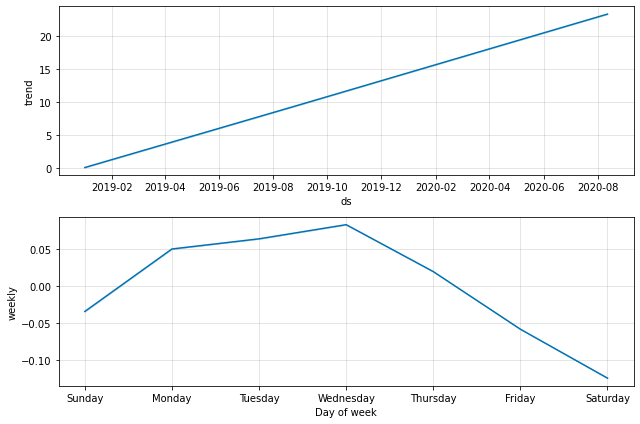

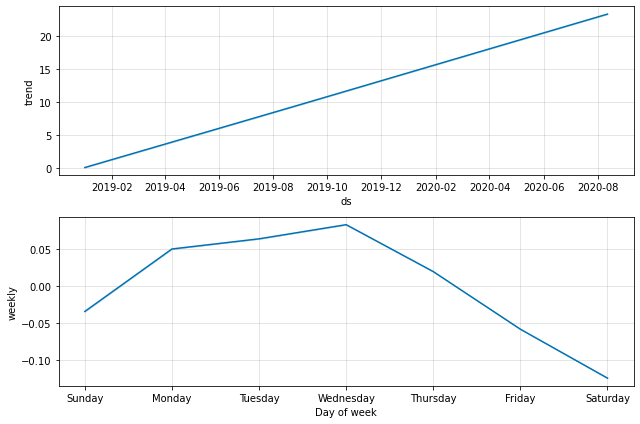

In [93]:
# Use the plot_components function to analyze seasonal patterns in the company's revenue

mercado_sales_prophet_model.plot_components(mercado_sales_prophet_forecast)


Answer the following question:
Question: For example, what are the peak revenue days? (Mondays? Fridays? Something else?)

Answer: # Wednesday has the highest sales

Produce a sales forecast for the finance group. Give them a number for the expected total sales in the next quarter. Include the best- and worst-case scenarios to help them make better plans.

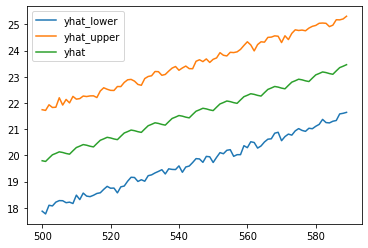

In [94]:
# Plot the predictions for the Mercado sales

mercado_sales_prophet_forecast[['yhat_lower','yhat_upper','yhat']].iloc[-90:,:].plot()

In [95]:
# For the mercado_sales_prophet_forecast DataFrame, set the ds column as the DataFrame Index
mercado_sales_prophet_forecast = mercado_sales_prophet_forecast.set_index(['ds'])

# Display the first and last five rows of the DataFrame
mercado_sales_prophet_forecast.head(5)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2019-01-01,0.132576,-1.583927,2.123557,0.132576,0.132576,0.063966,0.063966,0.063966,0.063966,0.063966,0.063966,0.0,0.0,0.0,0.196542
2019-01-02,0.171762,-1.640089,2.105348,0.171762,0.171762,0.083117,0.083117,0.083117,0.083117,0.083117,0.083117,0.0,0.0,0.0,0.254879
2019-01-03,0.210947,-1.672259,2.122348,0.210947,0.210947,0.019670,0.019670,0.019670,0.019670,0.019670,0.019670,0.0,0.0,0.0,0.230618
2019-01-04,0.250133,-1.684567,2.171420,0.250133,0.250133,-0.058258,-0.058258,-0.058258,-0.058258,-0.058258,-0.058258,0.0,0.0,0.0,0.191875
2019-01-05,0.289318,-1.870999,1.949650,0.289318,0.289318,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,-0.124450,0.0,0.0,0.0,0.164868


In [107]:
# Produce a sales forecast for the finance division
# giving them a number for expected total sales next quarter.
# Provide best case (yhat_upper), worst case (yhat_lower), and most likely (yhat) scenarios.

# Create a forecast_quarter Dataframe for the period 2020-07-01 to 2020-09-30
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
mercado_sales_forecast_quarter = mercado_sales_prophet_forecast.loc["2020-07-01": "2020-09-30"]

# Update the column names for the forecast_quarter DataFrame
# to match what the finance division is looking for 
mercado_sales_forecast_quarter = mercado_sales_forecast_quarter.rename(columns={"yhat_upper":"Optimistic Revenue", "yhat_lower":"Conservative", "yhat":"Projected"})


# Review the last five rows of the DataFrame
mercado_sales_forecast_quarter = mercado_sales_forecast_quarter[["Optimistic Revenue","Conservative","Projected"]]

mercado_sales_forecast_quarter.head()



,Optimistic Revenue,Conservative,Projected
ds,,,
2020-07-01,23.579939,19.734961,21.798378
2020-07-02,23.682250,19.961485,21.774541
2020-07-03,23.547457,19.946356,21.736223
2020-07-04,23.667335,19.729052,21.709640
2020-07-05,23.720066,19.925152,21.839417


In [108]:
# Displayed the summed values for all the rows in the forecast_quarter DataFrame
# YOUR CODE HERE
mercado_sales_forecast_quarter = mercado_sales_forecast_quarter[["Optimistic Revenue","Conservative", "Projected"]].sum()

mercado_sales_forecast_quarter

Optimistic Revenue    1051.031452
Conservative           888.070959
Projected              969.607010
dtype: float64

Based on the forecast information generated above, produce a sales forecast for the finance division, giving them a number for expected total sales next quarter. Include best and worst case scenarios, to better help the finance team plan.

Answer: # YOUR ANSWER HERE